# Data Analytics and Visualization with Python

### Learning Objective - 

- Descriptive Statistics
- Visualizing Data
    - Introduction to matplotlib library
    - Anatomy of a figure
    - Creating sub-plots
    - Chart aesthetics
- Visual Data Analytics
    - Univariate Analysis
        - count plots
        - histograms and boxplot
    - Bivariate Analysis
        - scatter plot
        - bar plot
        - line charts
        - pair plots, heatmaps
- Create and publish interactive charts using plotly and Dash

### Final Code ------------------------------------------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [3, 2]

df = pd.read_csv(r"./Datasets/coffee_sales.csv", header=3)

df.dropna(axis = 1, how="all", inplace=True)
df.fillna({"Target Profit" : "0"}, inplace=True) 

trans_obj = str.maketrans("", "", "$,")  # Note - use translate if more than 1 replace statements are needed
df.Sales = df.Sales.str.translate(trans_obj).astype(float)
df["Target Sales"] = df["Target Sales"].str.translate(trans_obj).astype(float)
df.Profit = df.Profit.str.replace("$", "").astype(float)
df["Target Profit"] = df["Target Profit"].str.replace("$", "").astype(float)

df["Sales Target Status"] = np.where(df.Sales >= df["Target Sales"], "Achieved", "Not-Achieved")
df["Profit Target Status"] = np.where(df.Profit >= df["Target Profit"], "Achieved", "Not-Achieved")

df["Date"] = pd.to_datetime(df["Date"], format = "mixed")
df.insert(1, "Year", df.Date.dt.year)
df.insert(2, "Month", df.Date.dt.month_name())

df.head()

## Data Visualisation

### Primary Objects of matplotlib
<img src = "./images/figure.png" align = left width = 300>
<br><br><br><br><br><br><br><br>

- The [figure] is the overall figure space that can contain one or more plots
- The [axes] is the individual plots that are rendered within the figure

### Anatomy of a figure

<img src = "./images/figure_anatomy.jpg" align = left width = 400>

#### Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dates = np.arange('2019-01', '2022-01', dtype='datetime64[M]')
sales = np.array([42390, 77560, 77385, 76039, 42968, 53833, 47205, 68936, 51175, 48186, 71520, 66387, 62717, 52614, 42866, 64275, 44749, 68560,66258, 62221, 66303, 52428, 42300, 65645, 59215, 66944, 67519,46231, 79780, 59746, 59992, 70805, 64609, 72995, 60402, 76956])
profits = np.array([ 7206.3 ,  8531.6 , 13155.45,  9885.07,  7304.56,  9689.94, 5664.6 , 11029.76,  6141.  ,  5300.46,  9297.6 , 11285.79, 7526.04,  5787.54,  6429.9 , 12212.25,  5369.88, 12340.8 , 12589.02,  6222.1 ,  7293.33,  8388.48,  6768.  , 11816.1 , 7697.95, 11380.48,  7427.09,  6934.65,  8775.8 ,  7169.52, 7199.04,  9204.65, 10337.44,  9489.35, 10268.34, 14621.64])

### Line Chart

In [ ]:
fig = plt.figure(figsize=(10, 2))
plt.plot(dates, sales, ls = "-.", c = "Green", marker = "o")
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.plot(dates, sales, ls = "-.", c = "Green", marker = "o")
plt.plot(dates, profits, ls = "-.", c = "Orange", marker = "o")

plt.title("Sales and Profits over Months", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 14})
plt.grid(visible=True, axis="y", c = "lightgrey", alpha = 0.4)

plt.yticks(range(0, sales.max() + 100, 5000))
plt.xticks(dates, rotation = 60)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 5), nrows=2, sharex=True)

ax[0].plot(dates, sales, ls = "-.", c = "Green", marker = "o")
ax[1].plot(dates, profits, ls = "-.", c = "Orange", marker = "o")

ax[0].set_title("Sales over Months", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 14})
ax[1].set_title("Profits over Months", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 14})

ax[0].grid(visible=True, axis="y", c = "lightgrey", alpha = 0.4)
ax[1].grid(visible=True, axis="y", c = "lightgrey", alpha = 0.4)

# ax[1].set_yticks(np.arange(0, profits.max() + 1000, 1000))
ax[0].set_xticks([])

plt.show()

#### Dataset using coffeesales

In [ ]:
data = df.groupby("Product")[["Sales", "Profit"]].sum()
products = data.index
sales = data.Sales
profits = data.Profit

### Bar Chart

In [ ]:
plt.figure(figsize = (14, 2))

plt.bar(products, sales, color = "teal", edgecolor = "midnightblue", width = 0.6)

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})

plt.axhline(sales.mean(), color = "orange", ls = "--", label = "Average Sales")

plt.annotate(f"Avg - {sales.mean().round()}", xy = (0, sales.mean()))

plt.annotate(f"max sales", xy = (sales.argmax(), sales.max()+ 10))

plt.show()

### Sorted Bar Chart

In [ ]:
plt.figure(figsize = (14, 2))

sort_ord = np.argsort(sales)[::-1]

plt.bar(products[sort_ord], sales.iloc[sort_ord], color = "teal", edgecolor = "midnightblue", width = 0.6)

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})

plt.axhline(sales.mean(), color = "orange", ls = "--", label = "Average Sales")

plt.annotate(f"Avg - {sales.mean().round()}", xy = (0, sales.mean()))

plt.show()

### Stacked Bar Chart

In [ ]:
plt.figure(figsize = (14, 2))

plt.bar(products, sales, color = "teal", edgecolor = "midnightblue", width = 0.6)
plt.bar(products, profits, color = "cyan", edgecolor = "midnightblue", width = 0.6)

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales and Profits", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})
plt.legend(["Sales", "Profits"])

plt.show()

### Side-by-Side Bar chart

In [ ]:
plt.figure(figsize = (14, 2))

plt.bar(products, sales, color = "teal", edgecolor = "midnightblue", width = -0.4, align="edge")
plt.bar(products, profits, color = "cyan", edgecolor = "midnightblue", width = 0.4, align="edge")

plt.xticks(fontsize = 8, rotation = 10)
plt.yticks(fontsize = 8)

plt.title("Product wise Sales and Profits", loc = "left", fontdict= {"color" : "midnightblue", "fontsize" : 12})
plt.legend(["Sales", "Profits"])

plt.show()

### Bullet Chart

In [ ]:
data = df.groupby("Product")[["Profit", "Target Profit"]].sum()
products = data.index
profits = data.Profit
t_profit = data["Target Profit"]

In [ ]:
colors = np.where(profits >= t_profit, "yellowgreen", "lightcoral")
colors

In [ ]:
plt.barh(products, profits, height = 0.6, color = colors, edgecolor = "grey")
plt.plot(t_profit, products, marker = "|", markersize = 15, ls = "", c = "navy")

## Visual Data Analytics

### Univariate Analysis
Univariate analysis is a statistical method used to describe and analyze data consisting of only one variable. It focuses on understanding the characteristics and distribution of a single variable without considering the relationship with other variables.

- Descriptive Statistics
- Frequency Distribution
- Measures of Central Tendency
- Measures of Dispersion
- Visualization:
    - Box plots: Displaying the distribution of data using quartiles.
    - Histograms: Showing the frequency distribution of continuous variables.
    - Bar charts: Displaying the frequency distribution of categorical variables.
- Probability Distribution:
  - Normal distribution: Assessing if the data follows a normal distribution using graphical methods or statistical tests.

#### Categorial variable 

###### Ex. Visualise Target status on a bar chart

In [ ]:
df["Sales Target Status"].value_counts()

In [ ]:
data = np.round(df["Sales Target Status"].value_counts(normalize=True) * 100, 2)
data

In [ ]:
_ = data.plot(kind = "bar", xlabel = "")
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# directly using seaborn
_ = sns.countplot(data= df, x = "Sales Target Status")
plt.ylabel("")

In [ ]:
# directly using seaborn
ax = sns.countplot(data= df, hue = "Sales Target Status", x = "City")
# ax.legend_.remove()
ax.legend(fontsize = 'x-small')
plt.xlabel("", fontsize = 4)
_ = ax.set_ylabel("")

### Numeric Variable

Descriptive statistics deals with summarizing and describing the features of a dataset or sample. Descriptive statistics provides a summary of the main features of the data, including measures of central tendency, dispersion, shape, and relationships between variables.

**Measures of Central Tendency:**

    - Mean: The average value of the data points.
    - Median: The middle value of the data when arranged in ascending order.
    - Mode: The most frequently occurring value in the dataset.

**Measures of Dispersion:**

    - Range: The difference between the maximum and minimum values in the dataset.
    - Variance: The average of the squared differences from the mean.
    - Standard Deviation: The square root of the variance, representing the average deviation from the mean.

**Measures of Shape:**

    - Skewness: A measure of the asymmetry of the distribution.
        - Positive skewness indicates a longer right tail and a concentration of data on the left side.
        - Negative skewness indicates a longer left tail and a concentration of data on the right side.
        - Skewness close to zero indicates approximate symmetry around the mean.

    - Kurtosis: A measure of the "peakedness" or "flatness" of the distribution.
        - Positive kurtosis indicates heavy tails and a sharp peak (leptokurtic).
        - Negative kurtosis indicates light tails and a flat peak (platykurtic).
        - A kurtosis of 0 indicates a distribution with similar tails to the normal distribution (mesokurtic).

**Frequency Distribution:**

    - Frequency table: A table that shows the frequency or count of each value in the dataset.
    - Histogram: A graphical representation of the frequency distribution, showing the distribution of values in bins or intervals.

In [ ]:
data = df[["Sales", "Profit"]]

#### df.describe()

In [ ]:
data.describe().round(2)

#### Histogram

In [ ]:
_ = plt.hist(df.Sales)

In [ ]:
_ = data.plot(kind = "hist", y = "Sales")

In [ ]:
_ = sns.histplot(data, x = "Sales", kde = True)
plt.axvline(data.Sales.mean(), color = "orange", label = "Average")
plt.axvline(np.median(data.Sales), color = "green", label = "Median")
plt.legend()

In [ ]:
from scipy import stats
stats.kurtosis(data.Sales)

In [ ]:
stats.skew(data.Sales)

In [ ]:
_ = sns.histplot(data, x = "Profit", kde = True)
# plt.axvline(data.Profit.mean(), color = "orange", label = "Average")
# plt.axvline(np.median(data.Profit), color = "green", label = "Median")
# plt.legend()

In [ ]:
stats.kurtosis(data.Profit)

In [ ]:
stats.skew(data.Profit)

### Handling Outliers - 

#### `Z-Score Method:`

- The z-score method involves calculating the z-score for each data point, which represents the number of standard deviations away from the mean.
Data points with z-scores beyond a certain threshold (e.g., |z-score| > 3) are considered outliers and can be removed or treated separately.
The z-score method is sensitive to the mean and standard deviation of the data, and it assumes that the data is normally distributed.
This method is useful when the data is approximately normally distributed and when the goal is to identify outliers based on their deviation from the mean.

#### `IQR Method:`

- The IQR method involves calculating the interquartile range (IQR), which is the difference between the third quartile (Q3) and the first quartile (Q1) of the data.
Outliers are defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
The IQR method is robust to outliers and does not assume any specific distribution of the data.
This method is useful when the data is skewed or not normally distributed, as it focuses on the middle 50% of the data and is less influenced by extreme values.
In general, if the data is approximately normally distributed and the goal is to identify outliers based on their deviation from the mean, the z-score method may be more appropriate. On the other hand, if the data is skewed or not normally distributed, or if the goal is to identify outliers based on their relative position within the dataset, the IQR method may be a better choice.

#### Box and Whisker Plot

In [ ]:
_ = sns.boxplot(data, y = "Sales")

In [ ]:
median = np.median(df.Sales)
Q1 = np.percentile(df.Sales, 25)
Q3 = np.percentile(df.Sales, 75)

IQR = Q3 - Q1
min_w = Q1 - 1.5 * IQR
max_w = Q3 + 1.5 * IQR

###### Ex. Find number of outliers in Sales column using IQR method

In [ ]:
sum(df.Sales > max_w)

In [ ]:
_ = sns.boxplot(data, y = "Profit")

In [ ]:
median = np.median(df.Profit)
Q1 = np.percentile(df.Profit, 25)
Q3 = np.percentile(df.Profit, 75)

IQR = Q3 - Q1
min_w = Q1 - 1.5 * IQR
max_w = Q3 + 1.5 * IQR

In [ ]:
sum(~df.Profit.between(min_w, max_w))

#### Z-Scores

If data is normally distributed - 

- 68% of data will be have zscore = 1 or will 1 std away from the mean.
- 95% of daa will be 2 std away from the mean
- 99.7% of data will be 3 std away from mean

In [ ]:
# dataset consists of weights children in the age group of 0 to 10 years
weights = np.array([20.8,15.3,23.2,15.5,17.5,27.3,23.3,20.5,16.4,17.4,22.6,20.8,16.7,29.1,14.2,18.5,17.6,17.1,18.2,26.0,25.6,19.1,17.8,21.6,19.6,28.4,19.4,22.8,25.9,27.1,20.8,21.9,15.4,30.2,23.0,25.0,24.0,17.1,18.8,25.8,23.2,14.9,20.4,15.0,12.3,17.6,10.3,12.1,25.8,21.9,9.9,24.8,17.9,22.0,27.6,21.7,26.3,19.9,16.6,17.8,8.0,21.5,17.9,33.6,20.4,21.9,19.8,15.3,25.6,24.7,10.6,22.1,18.8,9.8,14.9,18.7,27.6,21.2,25.1,21.9,22.1,19.6,10.4,17.2,18.3,21.2,21.1,21.0,19.1,14.8,19.2,18.3,22.1,14.1,19.3,16.2,25.6,14.8,22.3,25.0,20.8,21.2,16.6,15.0,15.6,24.7,26.1,18.1,14.1,25.5,21.4,32.7,13.8,27.4,15.8,18.4,21.3,27.5,15.8,27.2,26.9,16.2,22.6,15.3,22.5,26.6,24.7,28.4,28.0,19.9,9.9,16.5,19.5,11.7,27.9,28.1,21.1,20.0,14.5,25.9,13.3,15.8,21.3,10.7,14.6,19.9,21.6,26.6,26.0,23.7,20.5,11.8,15.6,14.9,24.6,20.9,24.5,26.8,25.3,30.9,26.1,14.9,17.9,18.5,25.7,16.4,8.2,24.1,19.5,13.1,17.6,13.4,24.4,16.4,19.9,12.9,14.3,25.4,15.4,17.7,17.3,18.7,16.1,7.4,18.4,16.2,18.7,19.8,25.6,23.7,22.5,20.5,14.9,25.0,4.7,6.8,21.8,22.2,24.4,13.4,32.1,26.6,27.2,17.8,19.6,16.8,14.4,24.9,12.6,15.0,15.4,10.1,12.9,15.9,22.3,15.0,24.4,21.0,17.2,25.2,15.6,24.6,24.9,13.6,10.3,25.6,18.3,25.1,18.1,20.2,29.1,25.7,14.9,11.4,19.2,21.5,13.9,19.5,19.1,23.0,26.8,14.8,24.4,14.7,24.3,24.5,19.9,12.1,21.2,16.4,19.5,25.8,8.5,19.8,23.4,21.3,14.7,17.9,15.7,14.9,5.2,3.8,31.5,17.4,16.0,20.7,18.4,8.1,22.9,32.8,19.0,33.0,26.0,14.2,18.4,15.1,29.5,13.9,5.1,28.1,18.2,10.5,27.8,19.4,13.1,21.9,18.6,11.0,19.7,20.2,20.1,17.6,21.6,21.2,30.0,26.1,20.5,22.8,20.5,19.6,18.0,19.8,21.8,7.0,21.4,22.5,18.9,15.1,22.0,25.5,11.1,15.4,21.5,13.5,11.2,19.3,25.5,20.2,18.3,15.3,40.3,22.1,23.2,17.1,19.4,15.3,28.6,23.0,19.4,16.7,20.9,21.1,15.9,29.6,17.0,19.0,20.8,20.4,9.8,24.0,15.2,26.2,22.0,21.4,16.2,29.2,21.4,28.9,16.9,21.9,11.2,19.0,21.2,20.8,9.3,12.5,26.9,10.7,18.9,17.5,23.3,12.5,13.4,26.3,23.0,21.8,25.6,20.7,18.0,32.5,25.6,8.4,19.8,24.5,18.0,24.7,21.3,12.9,21.6,29.1,25.8,26.4,27.0,25.6,19.0,20.0,10.4,17.5,19.5,17.5,21.1,19.6,23.1,18.2,27.0,18.5,19.3,25.4,20.8,20.8,20.6,20.4,23.1,17.6,18.7,16.2,18.9,15.2,22.5,10.0,21.1,29.3,17.8,27.1,16.8,18.0,28.3,16.5,19.8,16.7,23.2,23.6,18.5,29.8,24.2,22.4,29.3,29.3,21.5,15.5,23.0,12.8,20.8,11.5,20.0,15.2,18.7,17.2,22.5,13.5,13.1,17.6,12.1,23.2,18.0,24.2,7.3,17.0,17.0,22.7,22.1,18.0,15.6,13.9,17.7,14.7,26.1,12.2,20.3,17.8,16.5,10.2,18.2,22.2,26.3,26.6,19.2,19.5,14.3,15.6,13.9,20.2,11.6,31.2,6.3,23.4,21.1,22.0,8.5,11.5,19.3,17.7,11.9,14.8,16.9,16.1,13.0,17.9,22.0,14.2,13.9,25.4,21.1,16.3,16.4,19.3,18.3,23.0,27.4,24.2,14.9,12.7,16.7,17.8,19.5,14.9,23.9,15.2,25.4,22.9,25.2,12.7,26.0,26.7,15.8,24.9,24.4,15.5,20.0,7.8,20.6,19.0,29.8,14.1,14.1,17.8,24.9,20.7,19.8,24.2,16.7,21.3,23.7,20.9,23.6,25.3,9.9,21.7,16.7,10.3,18.9,25.2,12.7,27.4,21.4,23.0,11.8,22.1,13.0,20.0,27.2,19.8,16.9,18.8,25.0,9.0,19.0,11.1,19.6,24.0,29.3,20.7,10.7,26.9,18.6,21.5,26.2,21.5,27.9,22.1,25.1,27.9,18.9,26.4,20.0,25.6,27.5,17.7,18.9,27.0,14.9,27.6,19.6,18.1,19.2,20.2,16.4,16.6,14.1,8.9,17.6,17.3,21.0,14.3,18.7,19.9,12.3,24.4,23.3,25.1,27.9,15.1,18.3,23.2,17.8,15.5,22.0,23.0,20.4,15.5,22.8,19.5,22.2,22.3,25.1,15.0,19.9,23.8,18.8,17.0,7.9,24.0,31.4,17.6,27.4,28.1,17.9,18.3,17.3,21.6,17.8,22.4,19.2,22.8,21.4,19.1,22.4,29.4,13.6,15.0,28.8,18.2,25.8,15.1,23.6,12.2,10.1,15.4,27.0,17.2,11.6,20.8,18.8,20.4,18.1,20.9,31.1,19.0,18.5,17.9,23.1,32.0,21.7,23.4,17.1,19.0,18.1,19.3,18.8,25.8,19.8,22.1,15.8,15.9,21.3,18.4,17.8,23.1,22.2,15.3,20.0,20.8,30.2,24.0,12.6,9.2,21.7,19.8,16.6,16.5,18.0,21.1,10.0,23.5,26.9,23.7,16.8,12.7,29.8,17.9,18.6,19.9,23.6,26.4,18.2,18.1,19.2,15.3,19.4,20.2,33.2,26.2,26.9,15.3,18.9,18.3,27.6,29.0,22.5,30.2,22.8,13.8,21.4,27.3,25.1,26.7,7.9,27.3,21.9,15.6,18.1,19.9,23.0,22.9,15.0,16.5,18.9,24.8,4.9,16.7,20.2,7.9,19.3,16.1,22.5,27.4,29.6,18.7,21.9,9.9,24.6,10.1,21.5,20.6,11.4,14.0,18.4,6.5,12.8,25.5,19.5,14.6,20.5,18.9,14.8,21.7,17.3,33.1,23.1,25.1,30.2,17.0,13.2,29.2,14.8,13.5,22.3,9.0,19.2,19.1,20.4,14.2,20.6,19.3,27.6,21.4,15.5,23.4,13.2,12.1,23.2,33.8,17.5,19.1,23.2,12.6,24.6,14.6,19.5,20.1,13.4,12.4,14.6,16.8,27.5,19.5,11.5,15.4,24.0,21.1,21.8,29.1,18.9,21.3,18.9,20.1,13.7,19.7,17.0,34.0,24.0,16.9,19.3,19.9,19.4,19.3,21.5,20.8,20.1,27.1,23.5,22.9,19.4,14.8,28.6,23.2,8.7,30.1,19.1,15.1,22.3,17.4,23.8,18.1,20.4,23.1,22.4,13.7,25.5,25.9,21.3,21.6,21.4,29.7,18.1,10.3,23.6,21.0,13.1,10.6,20.8,21.7,19.4,21.4,25.1,16.6,11.1,13.8,21.1,22.0,20.8,19.1,24.4,15.2,25.1,19.2,10.5,21.8,17.5,19.6,8.2,22.1,21.8,13.6,15.1,28.4,22.0,28.6,25.3,29.3,19.1,20.8,10.8,23.6,13.5,23.2,16.9,22.9,21.3,21.8,31.3,21.1,17.1,25.5,26.1,19.2,19.9,26.4,34.9,17.4,24.2,17.5,21.7,11.3,4.9,21.3,17.2,15.6,22.4,28.2,22.3,21.3,20.5,18.4,17.5,9.7,21.4,12.8,20.0,20.7,16.1,26.2,20.9,19.2,23.6,22.4,31.7,22.5,20.3,13.8,23.3,17.4,3.0,16.6,17.1,27.8,17.4,13.7,14.1,26.4,23.9,21.2,27.4,9.9,18.7,17.0,21.1,22.9,8.7,19.1,25.1,21.0,22.3,21.5,19.6,17.6,22.7,14.7,11.5,28.6,19.9,13.5,27.3,19.6,18.7,14.0,11.6,15.0,26.5,21.7,22.1,5.7,18.3,23.4,19.5,15.8,18.6,19.3,27.0,21.7,21.9,20.7,13.5,29.7,22.3,24.0,31.1,23.9,15.7,19.6])
sns.histplot(weights, kde = True)

In [ ]:
weights.mean()

In [ ]:
weights.std()

In [ ]:
scores = stats.zscore(weights)
sns.histplot(scores, kde = True)

In [ ]:
stats.skew(weights)

In [ ]:
stats.kurtosis(weights)

#### Calculating z-scores for Sales

In [ ]:
zscores = stats.zscore(df.Sales)
sns.histplot(zscores, kde = True)

In [ ]:
# dataset consists of Salaries of employees in an organisation
salaries = np.array([29756,20014,20347,57214,41327,40209,93390,122004,17725,47210,44386,48407,16837,83731,9130,66723,72525,57347,10941,18726,8913,59251,13090,37983,134656,45499,59533,82998,31440,11672,16295,30676,21822,35263,27340,65522,23380,11662,7066,22403,41230,46693,22478,82491,7347,16263,72672,20522,38409,30175,31383,98820,13605,45096,12397,90988,6602,29786,102559,31790,29768,50085,22649,24426,4059,95210,68657,17799,37370,46160,35133,40969,57201,54757,17973,13610,46004,91341,24474,48005,9473,10277,71287,9383,36492,104352,13473,51293,51911,10026,39992,125885,44462,76531,41512,47267,33231,14180,44474,55702,39554,8359,51892,98574,43638,90568,40508,34129,98497,74784,63383,47197,83519,26458,38642,9629,18404,47324,15793,120345,61126,64613,57964,47582,77944,27082,51891,98126,69008,23284,49785,72406,56418,36769,58715,42999,47333,45733,141091,3848,57584,48356,95301,95269,49894,101380,44028,54577,71055,32066,26596,66653,3179,44484,62889,62952,50903,74656,50733,38180,59410,105003,73854,33579,150293,26348,6769,26315,53038,35766,50517,64714,27523,26867,46607,9882,60052,46653,42143,37371,14475,103629,55402,6149,65128,32861,27603,75553,35641,21457,106916,50369,37731,6473,73858,7716,21144,34340,27917,18150,49270,16344,84532,28616,18452,84678,17990,26463,13671,70005,26237,7245,16941,64383,3317,7275,26981,12600,36983,40054,7283,82140,65120,8259,44235,30682,68578,80737,14009,88942,48374,43148,11447,32203,67168,50149,8607,9680,35442,47306,67316,52503,89884,18337,11798,40659,90852,25479,4737,107231,40006,34020,61695,12128,14126,71024,42150,54591,93625,23809,9698,50910,75967,36494,53497,28006,16650,50352,42133,10915,50698,19962,30772,23430,75790,72083,162101,75728,60565,40074,58299,18280,128972,76801,38314,12744,25607,22188,31862,15955,31175,11044,44390,49677,33251,85617,81684,48054,63108,33461,39505,51449,47547,49199,152777,49820,23147,35010,44921,39633,16546,35436,32229,28603,31804,21668,102866,58514,140647,22149,26732,88552,77813,75665,38038,123394,9457,28241,52657,9075,148287,70362,27398,18672,19003,17600,114609,4318,19729,23148,32015,87090,5342,56550,38458,5400,50686,46353,14777,19302,16606,21645,37117,22488,5465,28650,57321,34736,43956,37151,9776,37461,17631,98557,18773,15927,62892,35395,23658,27429,22496,60550,36644,38050,79320,7934,30101,71573,14389,4701,31291,11384,39725,123530,44408,58972,95799,10389,46232,3432,40560,35984,4665,169950,111402,18065,21540,70358,51973,26344,101435,5668,28783,6701,64979,30591,53626,89555,54550,47720,72312,32532,81224,32367,12856,45452,23288,68436,11028,48698,59988,25334,12898,76129,76496,66076,28330,66192,34221,24405,81851,52335,38502,25430,29421,7258,23734,12534,60625,23697,17543,35830,5033,17253,27189,48127,91649,58796,46586,42569,40202,70022,3922,41658,66536,67928,13621,71191,63947,89954,7543,20366,73226,55216,63823,20147,28646,62441,10910,21883,40687,5770,12349,59303,82027,45440,12710,126532,87569,69111,27004,13098,37670,125784,37616,46404,36971,20823,44255,53184,53752,9362,16464,13631,24283,57198,27205,60289,35590,21193,59034,71649,40198,22347,37446,30613,39731,23986,65414,6705,23140,42971,9792,23886,16397,17598,42024,32014,78351,31432,3978,34883,19845,10204,56595,25611,58573,31771,60213,24678,85938,22206,27750,43462,24977,22131,65617,70257,71995,75183,106608,54436,44381,61439,41163,81099,34095,36953,14703,23992,105384,20334,34145,48786,72804,71943,32757,77178,6381,77041,85234,31634,62231,7004,66194,23721,18122,82066,43339,13417,28110,26647,11703,160005,55765,78251,35519,22708,66840,6126,37952,31632,55294,13842,57847,43009,57445,41641,13437,41892,8126,55609,71439,65768,3032,12225,16758,12150,110890,58822,80581,12690,69074,49169,118185,9745,24482,35611,21100,13245,25269,26177,60738,119320,13615,120677,36560,14048,16249,73591,11789,42419,8691,44373,5698,38758,39244,36214,7654,26381,42371,42425,5167,38173,28250,11362,41671,38101,22759,29654,16846,42528,32035,51949,34841,65641,94153,55081,42157,53629,5482,6064,33333,53055,38653,54655,25486,28830,18681,38431,89032,38939,44533,44382,7073,93080,39698,68653,14900,4180,26923,27360,30629,33018,23166,4915,50098,31775,14625,48831,53413,50677,16354,24128,49869,23038,53312,43846,11263,19507,11322,86895,60729,144564,33429,36964,4437,48013,39779,71605,45697,20501,3059,39338,3228,22719,37974,72431,8486,24363,19558,64046,35799,20259,79873,13544,36404,55886,13904,42955,43750,17743,107390,86058,40137,65042,29084,8999,6357,29914,45867,75705,19543,64725,60567,58452,5015,50256,60877,91907,42209,13678,7797,23545,65227,86909,18614,12483,34314,52497,28754,112096,30756,16519,18075,9958,14076,16114,5200,40241,14275,53117,50561,27253,3998,85851,32716,44901,40698,42272,67106,73621,23828,50619,64147,89432,67240,119266,15347,50315,39374,27347,21786,7037,33320,9277,14225,25474,50546,61235,64796,38341,46464,38388,53785,8315,29782,35079,5943,9616,73662,52409,28236,40773,84419,49739,8678,46548,16583,15864,5920,42891,6635,91882,54534,32013,105413,11681,18153,98213,60754,53642,40221,43931,60076,9481,17046,26098,22609,21386,2797,11266,59378,57464,46271,10182,53724,89160,33549,19557,8022,43213,62795,42025,74820,49326,55701,65268,49257,38526,47121,32407,100592,21980,10691,10664,13298,58489,81011,24481,30354,5334,11554,62781,80241,17457,13682,12911,32340,54094,4987,15562,19126,58105,62497,34333,74015,78119,27715,20098,37580,14200,24208,36266,68885,66174,3965,143792,35892,43824,14009,7294,69932,11540,31644,55554,6756,69754,65940,26128,88712,11048,14382,34369,3908,30339,9290,22745,49669,93604,62655,50036,60244,52406,44821,37915,4894,38413,44612,19168,26668,20326,45231,12448,35082,121782,4863,7291,24332,42551,28462,67887,21226,41026,137990,53668,40922,15485,21118,118903,77715,24519,58873,61054,25674,2960,30624,103189,48284,40536,56053,37084,50773,11615,83270,4311,30367,6372,56358,14518,10602,35857,93798,51500,69148,51610,27676,16157,92788,4395,23687,11944,57418,71058,37037,23290,34201,84364,68400,24135,18615,15050,113480,83720,52761,26031,43187,11278,3710,27465,97386,3393,65371,5707,106125,46278,12099,17823,39132,34422])
print(f"Mean - {np.mean(salaries)}")
print(f"Median - {np.median(salaries)}")
print(f"Mode - {stats.mode(salaries)}")
print(f"Range - {np.min(salaries)} - {np.max(salaries)}")
print(f"Standard Deviation - {np.std(salaries)}")
print(f"skewness - {stats.skew(salaries)}")
print(f"kurtosis - {stats.kurtosis(salaries)}")

sns.histplot(x = salaries, kde = True)
plt.axvline(salaries.mean(), color = "red")
_ = plt.axvline(np.median(salaries), color = "Green")

In [ ]:
# dataset consists of life-expectancy data 
life_expectancy = np.array([52, 61, 58, 75, 74, 77, 58, 74, 54, 65, 67, 75, 74, 70, 36, 65, 35,55, 64, 28, 46, 52, 75, 42, 64, 75, 44, 65, 58, 65, 45, 73, 79, 48,55, 65, 53, 66, 56, 40, 76, 52, 77, 63, 74, 53, 22, 43, 33, 75, 60,58, 44, 69, 73, 36, 74, 72, 65, 56, 67, 68, 56, 67, 62, 59, 68, 53,59, 61, 59, 77, 76, 70, 78, 74, 64, 15, 42, 65, 70, 65, 64, 67, 65,66, 25, 65, 63, 75, 78, 63, 81, 80, 82, 66, 42, 26, 64, 72, 59, 78,69, 73, 79, 65, 60, 39, 64, 44, 77, 74, 42, 13, 73, 64, 65, 75, 78,72, 49, 75, 65, 59, 40, 70, 31, 58, 61, 79, 56, 67, 79, 61, 48, 68,52, 79, 70, 70, 59, 53, 75, 63, 31, 25, 63, 79, 60, 77, 77, 64, 33,52, 64, 40, 59, 80, 36, 64, 61, 54, 73, 21, 67, 45, 77, 78, 56, 32,81, 69, 82, 33, 16, 41, 79, 34, 77, 71, 74, 73, 44, 33, 59, 74, 43,67, 63, 73, 58, 59, 65, 55, 64, 76, 71, 60, 79, 76, 62, 50, 42, 72,60, 77, 44, 72, 54, 58, 56, 40, 61, 25, 47, 66, 74, 79, 62, 69, 22,67, 71, 40, 74, 80, 45, 68, 64, 55, 48, 52, 48, 49, 60, 62, 57, 23,67, 72, 76, 69, 56, 67, 58, 40, 78, 50, 53, 73, 66, 69, 73, 73, 37,60, 65, 60, 60, 68, 50, 33, 68, 24, 79, 52, 78, 30, 58, 81, 72, 79,75, 52, 51, 74, 66, 65, 41, 53, 57, 76, 63, 64, 48, 48, 77, 52, 60,61, 52, 39, 71, 26, 54, 68, 77, 64, 67, 62, 40, 67, 66, 47, 33, 69,74, 76, 62, 69, 54, 67, 33, 71, 56, 41, 79, 37, 64, 37, 70, 49, 60,74, 79, 65, 79, 79, 75, 78, 72, 76, 31, 70, 24, 59, 28, 78, 61, 75,40, 51, 74, 53, 72, 71, 55, 67, 39, 60, 67, 60, 72, 81, 75, 52, 63,66, 38, 57, 58, 71, 40, 72, 70,  6, 81, 41, 79, 46, 28, 48, 50, 65,76, 75, 32, 75, 70, 46, 73, 61, 48, 55, 41, 52, 48, 53, 62, 65, 69,18, 79, 78, 66, 65, 72, 65, 69, 69, 75, 83, 62, 78, 51, 46, 47, 46,82, 76, 64, 54, 72, 62, 47, 59, 63, 72, 55, 63, 78, 68, 73, 82, 61,47, 52, 78, 75, 42, 53, 65, 60, 48, 59, 52, 58, 76, 63, 76, 58, 67,40, 69, 74, 48, 60, 56, 75, 75, 54, 26, 50, 67, 59, 50, 70, 70, 62,38, 42, 63, 39, 72, 63, 42, 79, 69, 53, 59, 72, 75, 65, 37, 71, 39,43, 64, 84, 75, 80, 54, 66, 44, 60, 72, 73, 50, 62, 62, 58, 42, 61,80, 55, 73, 59, 60, 67, 50, 64, 74, 58, 73, 60, 57, 30, 70, 72, 63,54, 77, 56, 53, 73, 49, 75, 49, 47, 71, 77, 19, 77, 72, 63, 49, 67,65, 47, 71, 77, 71, 71, 53, 78, 76, 67, 65, 61, 60, 21, 60, 59, 68,43, 64, 76, 59, 72, 64, 38, 61, 65, 77, 64, 52, 78, 80, 35, 37, 80,58, 62, 71, 23, 67, 39, 67, 62, 52, 49, 61, 76, 66, 59, 42, 68, 75,60, 52, 73, 60, 70, 62, 74, 74, 61, 51, 23,  2, 39, 69, 52, 40, 46,72, 82, 77, 71, 82, 75, 77, 37, 52, 53, 70, 69, 65, 29, 54, 55, 55,75, 62, 46, 66, 77, 75, 73, 77, 71, 72, 77, 55, 51, 58, 66, 58, 80,75, 47, 78, 59, 66, 30, 76, 63, 57, 29, 53, 78, 71, 48, 58, 45, 59,63, 46, 68, 73, 69, 42, 63, 76, 59, 61, 65, 55, 70, 68, 38, 21, 64,71, 74, 77, 61, 67, 73, 78, 49, 31, 46, 64, 72, 33, 68, 76, 82, 59,59, 52, 66, 63, 11, 61, 74, 60, 61, 73, 54, 70, 45, 42, 58, 73, 36,82, 75, 51, 79, 58, 59, 68,  0, 78, 52, 61, 65, 73, 46, 81, 63, 27,82, 68, 80, 61, 79, 69, 42, 66, 52, 45, 62, 27, 76, 62, 64, 67, 43,51, 71, 77, 43, 24, 53, 52, 36, 52, 76, 69, 65, 73, 62, 68, 70, 75,70, 48, 58, 56, 66, 55, 62, 77, 62, 65, 51, 70, 60, 76, 74, 65, 72,62, 72, 42, 41, 43, 77, 68, 76, 76, 72, 56, 80, 77, 66, 57,  5, 72,67, 78, 81, 77, 66, 35, 54, 37, 42, 71, 78, 66, 68, 33, 25, 54,  8,72, 63, 38, 45, 67, 56, 64, 36, 54, 70, 71, 64, 72, 57, 59, 66, 51,77, 72, 36, 71, 70, 80, 39, 72, 74, 50, 58, 79, 25, 35, 61, 63, 50,68, 60, 82, 58, 14, 32, 77, 70, 65, 81, 73, 48, 67, 67, 30, 69, 69,59, 67, 74, 46, 53, 64, 75, 67, 54, 75, 61, 67, 19, 30, 62, 70, 76,47, 70, 73, 34, 57, 71, 56, 68, 44, 38, 47, 66, 72, 46, 68, 72, 44,58, 42, 62, 79, 45, 75, 37, 44, 24, 78, 52, 40, 75, 45, 52, 34, 74,82,  6, 78, 70, 36, 42, 75, 58, 20,  4, 53, 57, 69, 71, 53, 61, 26,67, 60, 76, 44, 68, 78, 80, 76, 55, 66, 67, 69, 71, 58, 69, 42, 53,35, 74, 56, 59, 41, 71, 64, 49, 68, 58, 69, 52, 75, 47, 77, 63, 53,42, 44, 72, 60, 59, 55, 57, 35, 78, 66, 73, 61, 47, 74, 75, 71, 45,43, 60, 53, 54, 79, 69, 46, 57, 64, 58, 36, 51, 77, 64, 72, 64, 44,54, 69, 59, 54, 58, 59, 68, 58, 75, 73, 62, 78, 51, 60])

print(f"Mean - {np.mean(life_expectancy)}")
print(f"Median - {np.median(life_expectancy)}")
print(f"Mode - {stats.mode(life_expectancy)}")
print(f"Range - {np.min(life_expectancy)} - {np.max(life_expectancy)}")
print(f"Standard Deviation - {np.std(life_expectancy)}")
print(f"skewness - {stats.skew(life_expectancy)}")
print(f"kurtosis - {stats.kurtosis(life_expectancy)}")

sns.histplot(x = life_expectancy, kde = True)
plt.axvline(life_expectancy.mean(), color = "red")
_ = plt.axvline(np.median(life_expectancy), color = "Green")


### Bivariate Analysis

Bivariate analysis is a statistical method used to analyze the relationship between two variables simultaneously. 

#### Numerical-Numerical Analysis:

- Scatter Plots: Scatter plots with a regression line can show the relationship between two continuous variables. Each data point represents a combination of values from both variables.

- Correlation Analysis: Quantifies the strength and direction of the linear relationship between two continuous variables. Pearson correlation coefficient (r) measures the degree of linear association between variables. 
	- It ranges from -1 to 1, where:
	- r = 1: Perfect positive correlation
	- r = -1: Perfect negative correlation
	- r = 0: No correlation

#### Categorical-Categorical Analysis:

- Contingency tables (also known as cross-tabulations) display the frequency distribution of categories for two categorical variables. 

#### Categorical-Numerical Analysis:

- Box plots or bar charts with groupings display the distribution of a numerical variable across different categories of a categorical variable.

#### Categorial vs Numeric

###### Ex. Visualise product-wise Sales

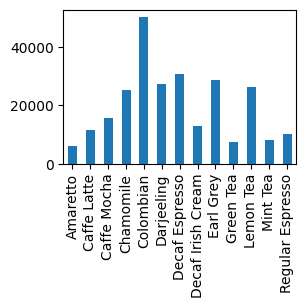

In [293]:
data = df.groupby("Product")["Profit"].sum()
_ = data.plot(kind = "bar")
_ = plt.xlabel("", fontsize = 10)

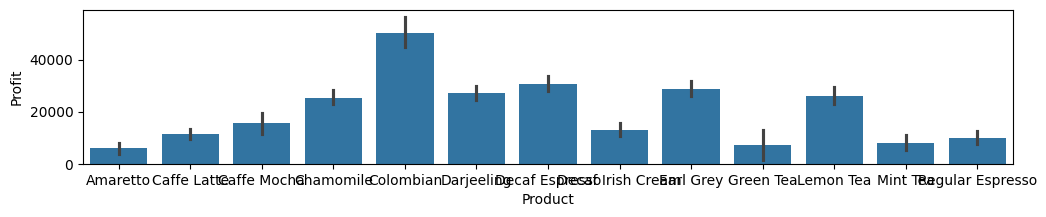

In [295]:
plt.figure(figsize=(12, 2))
_ = sns.barplot(df, y = "Profit", x = "Product", estimator = np.sum)

###### Ex. Display product-wise total sales across City Mumbai in DESC Order. Find the product generating maximum sales.

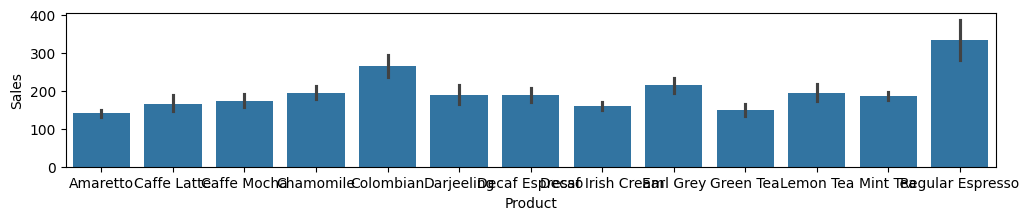

In [298]:
plt.figure(figsize=(12, 2))
_= sns.barplot(data = df[df.City == "Mumbai"], x = "Product", y = "Sales")

###### Ex. Display sales over year - month

<Axes: xlabel='Date', ylabel='Sales'>

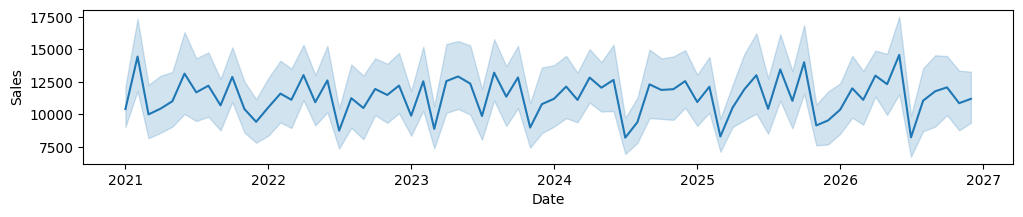

In [304]:
plt.figure(figsize=(12, 2))
sns.lineplot(df, x = "Date", y = "Sales", estimator=np.sum)

#### Numerical vs Numerical

<Axes: xlabel='Sales', ylabel='Profit'>

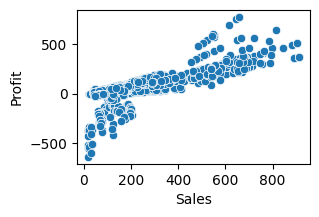

In [306]:
sns.scatterplot(df, x = "Sales", y = "Profit")

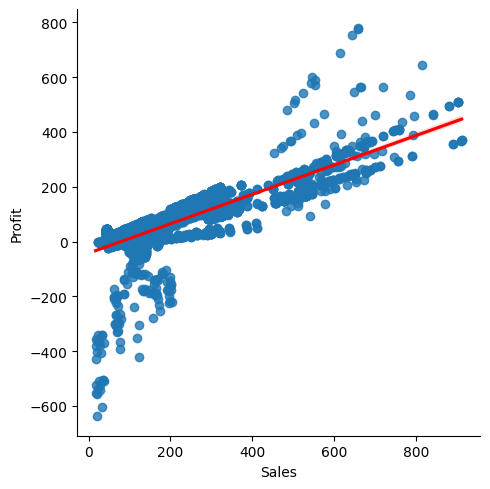

In [309]:
_ = sns.lmplot(df, x = "Sales", y = "Profit", line_kws = {"color" : "red"})

#### Categorial vs categorial

In [311]:
pd.crosstab(df.Product, df["Sales Target Status"])

Sales Target Status,Achieved,Not-Achieved
Product,,
Amaretto,107,109
Caffe Latte,216,0
Caffe Mocha,305,127
Chamomile,360,0
Colombian,191,241
Darjeeling,308,52
Decaf Espresso,284,148
Decaf Irish Cream,104,256
Earl Grey,326,34


###### How many franchises in each city are selling the product?

In [316]:
df.pivot_table(index="Product", columns="City", values="Franchise", aggfunc=lambda x : x.nunique()).fillna(0).astype(int)

City,Banglore,Hyderabad,Mumbai
Product,,,
Amaretto,0,0,3
Caffe Latte,1,0,2
Caffe Mocha,2,1,3
Chamomile,2,0,3
Colombian,2,1,3
Darjeeling,2,1,2
Decaf Espresso,2,1,3
Decaf Irish Cream,2,0,3
Earl Grey,1,1,3


In [320]:
df.pivot_table(index="Product", columns="City", values="Sales", aggfunc="sum").fillna(0)

City,Banglore,Hyderabad,Mumbai
Product,,,
Amaretto,0.0,0.0,30425.0
Caffe Latte,11923.0,0.0,23976.0
Caffe Mocha,25079.0,13866.0,37523.0
Chamomile,28726.0,0.0,42168.0
Colombian,37735.0,21644.0,57168.0
Darjeeling,27123.0,14463.0,27202.0
Decaf Espresso,28487.0,13193.0,40762.0
Decaf Irish Cream,23890.0,0.0,34566.0
Earl Grey,16877.0,17225.0,46346.0


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### Example on Multivariate Analysis

###### Ex. Number of franchises the product being sold in each city